<img align="right" width="120" height="120" style='padding: 0px 30px;' src="images/RR-logo.png"/>

# Introduction to Machine Learning with scikit-learn
This notebook will introduce the popular (and free!) machine learning toolkit [``scikit-learn``](https://scikit-learn.org/) written in Python. ``scikit-learn`` offers algorithms for supervised and unsupervised learning, dimensionality reduction, model selection and evaluation, and even some techniques for the visualization of results. It is designed to integrate nicely with other popular toolkits like [matplotlib](https://matplotlib.org/) and [plotly](https://plotly.com/) (for visualizations), [pandas](https://pandas.pydata.org/) (for tabular data analysis and manipulation), and [NumPy](https://numpy.org/) and [SciPy](https://scipy.org/) (for scientific computing). We will see some of this integration later!


In this exercise, we will walk through a typical processing pipeline to train and evaluate a simple classifier. 




*Click into a cell and hit "Shift+Enter" to execute it!*

In [1]:
""" Let's apply some Dartmouth-style colors to our plots """

import matplotlib as mpl

dartmouth_colors = ["#00693E", "#12312B", "#C3DD88", "#6EAA8D", "#797979", "#EBF3EF"]

mpl.rcParams.update({
                        'figure.facecolor': "#EBF3EF",
                        'figure.figsize': [7.50, 3.50],
                        'axes.prop_cycle': mpl.cycler(color=dartmouth_colors),
                        'axes.facecolor': "#FFFFFF",
                        'axes.labelcolor': '#12312B',
                        'text.color': '#12312B'
                    })



## Loading a dataset

In this notebook, we will work with the famous *Iris* flower dataset. It is a multivariate dataset consisting of 50 samples from each of three species of *Iris*. Each sample is described in terms of four features: the length and width of its sepals and its petals.

<style type="text/css" >
table {
    border-style: hidden;
    border-collapse: collapse;
    text-align: center;
    border-top: 3px solid;
    border-bottom: 3px solid;
}

tr, td, th {
    border-bottom: none !important;
    border-left: none !important;
    border-right: none !important;
}

</style>

<table>
  <tr>
    <th>Iris setosa</th>
    <th>Iris versicolor</th>
    <th>Iris virginica</th>    
  </tr>
  <tr>
    <td><img align="center" width="200" height="200" src="images/iris_setosa.jpg"/></td>
    <td><img align="center" width="200" height="200" src="images/iris_versicolor.jpg"/></td>
    <td><img align="center" width="200" height="200" src="images/iris_virginica.jpg"/></td>
  </tr>
  <tr>
    <td><a href="https://commons.wikimedia.org/wiki/File:Iris_setosa_2.jpg" target="_blank">"Iris setosa"</a> by <a href="https://commons.wikimedia.org/wiki/User:Kulmalukko" target="_blank">Tiia Monto</a><br> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0" target="_blank">CC BY-SA 4.0</a></td>
    <td><a href="https://commons.wikimedia.org/wiki/File:Blue_Flag_Iris_(15246206044).jpg" target="_blank">"Blue Flag Iris"</a> by <a href="https://www.flickr.com/people/49208525@N08" target="_blank">USFWSmidwest</a><br> is licensed under <a href="http://creativecommons.org/licenses/by/2.0" target="_blank">CC BY 2.0</a></td>
    <td><a href="https://commons.wikimedia.org/wiki/File:Iris_virginica_L_JdP_2013-05-28_n01.jpg" target="_blank">"Virginia Iris"</a> by <a>Marie-Lan Nguyen</a><br> is licensed under <a href="http://creativecommons.org/licenses/by/2.5" target="_blank">CC BY 2.5</a></td>    
  </tr>
  <tr>
    <td>Class 0</td>
    <td>Class 1</td>
    <td>Class 2</td>    
  </tr>
</table>

The data was originally collected by the American botanist Edgar Anderson [[1]](#anderson_1936). It is so well known today because of its use by the British statistician and biologist Ronald Fisher, who used it to showcase his method of Linear Discriminant Analysis [[2]](#fisher_1936). Because of the dataset's simplicity and interesting structure, it lends itself well to demonstrations of all sorts of algorithms and is therefore still popular today among machine learning educators.

It is in fact so popular that it is shipped with ``scikit-learn`` and can be easily loaded into our workspace using the function [``load_iris()``](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) from the submodule ``sklearn.datasets``. 

Because it offers loads of convenient methods to manipulate and visualize our tabular data, we want to load the dataset as a [``pandas.DataFrame``](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) object. We can do this by setting the parameter ``as_frame`` to ``True``.

In [2]:
from sklearn.datasets import load_iris

dataset = load_iris(as_frame=True)

When we load the dataset in this, way we get a special, ``scikit-learn``-specific data structure called a [``Bunch``](https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch). A ``Bunch`` is very much like a standard Python [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries): It stores pairs of *keys* and *values*. We can obtain the *values* by passing the *key*. We can get a list of all the keys in the ``Bunch`` by calling its ``keys()`` method:

In [3]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Feel free to explore the values corresponding to the other keys, but in this notebook we will simply grab the ``DataFrame`` that is stored under ``frame`` and the names of the features (``'feature_names'``) and species (``'target_names'``):

In [4]:
iris = dataset['frame']
target_names = dataset['target_names']
feature_names = dataset['feature_names']

**Quick sidenote:** A `DataFrame` is an object defined in the package `pandas`! `scikit-learn` uses it, because it is a great way to represent the tabular data. This is an example of the integration with other packages mentioned above. Why re-invent the wheel if you can build upon the great work of others? After all, we are basically doing the same thing when we use `scikit-learn` in our own code!

Let's do some quick visualization to see how many samples of each species we have in our dataset (the *class distribution*):

<AxesSubplot: >

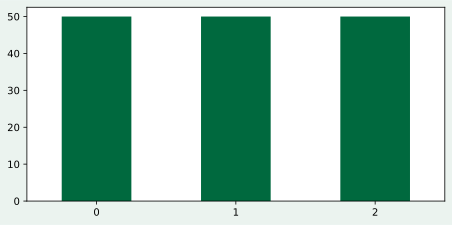

In [5]:
iris.target.value_counts().plot(kind='bar', rot=0)

Note that we did not call any `scikit-learn` code here, but `DataFrame` methods, which are implemented in `pandas`! But we don't really need to worry about that, because everything is so neatly integrated.

Great, so we have the same number of samples from each species (or class). That means our dataset is *balanced*. This is a good thing because in an *imbalanced* dataset, machine learning models tend to be better at identifying the majority class than at identifying the minority class (i.e., a high bias) and we need to apply special techniques to counter this behavior (e.g. over- or undersampling, or special scoring metrics). Our balanced Iris dataset does not need any special attention in that regard.

Next, let us take a look a the features and if we can spot any patterns in them!

One way to do this is to plot all the two-dimensional scatter plots:
- *sepal length* versus *sepal width*
- *petal length* versus *petal width*
- *sepal length* versus *petal length*
- ...

That is a lot of pairwise plots. Luckily, we can use a function from the package [``seaborn``](https://seaborn.pydata.org/index.html) called [``pairplot()``](https://seaborn.pydata.org/generated/seaborn.pairplot.html) that conveniently does all the work for us!

`seaborn` is a library for statistical data visualization that plays very nicely with `DataFrame` objects. So let's import and use it:

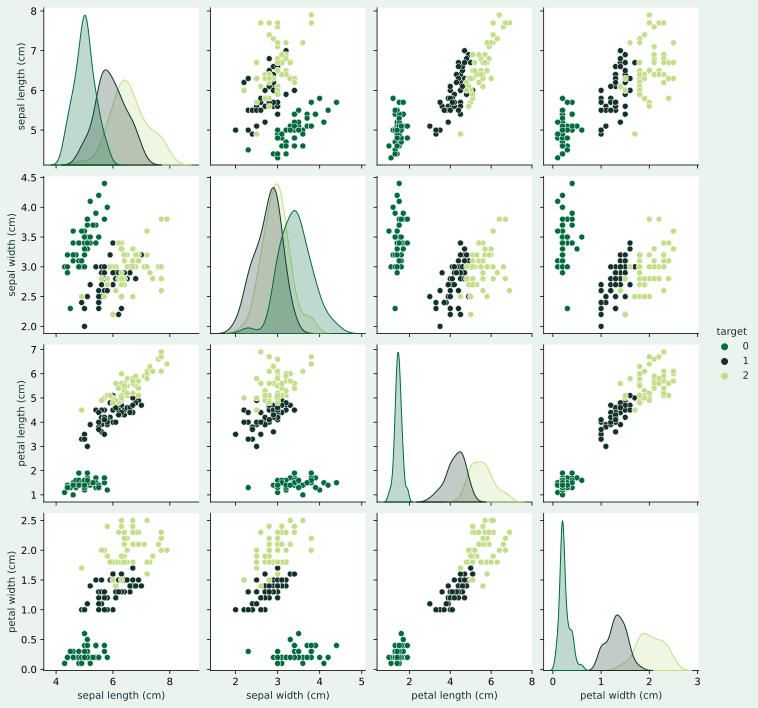

In [6]:
import seaborn as sns
sns.pairplot(data=iris, hue='target', palette=sns.color_palette(dartmouth_colors)[:3])

We can see that in some plots, dots of the same color are neatly clustered and the clusters overlap very little. Others are a bit more messy. Can you guess, which species (or *class*) may be harder to distinguish from the other two?

We also suspect some strong correlations between features. Let's investigate by calculating the pair-wise correlation using the ``DataFrame`` method [``corr()``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)!

In [7]:
iris[feature_names].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


Indeed, we have quite strongly correlated features in this dataset! 

In machine learning, we generally prefer uncorrelated features because correlated features add only very little information that can help to differentiate between the classes.

We should keep the strong correlations in mind for later. As a general rule, a simple model using few features is preferred over a complex model using many features. So maybe we don't even need to use all features in our model?



## Preprocessing


A common issue when dealing with a multivariate dataset is that the different features can be on very different scales. That means that when we compute distances in the feature space, features with generally high values will contribute disproportionately to the overall distance.

Before we process our data further, it is therefore usually a good idea to normalize or standardize our data. A common standardization method is to calculate the *$z$-score*. We subtract the mean $\mu$ and divide by the standard deviation $\sigma$ from each feature value $x$: 

$$z = \frac{x - \mu}{\sigma}$$

This transformation does not change the relative distribution of the data, it only transforms the *scale*. Here is an example of two samples, both with the same relative distribution but on different scales (left column). The shape of the distribution does not change when we calculate their respective $z$-scores (right column). But now they are on the same scale!

<center><img src=images/zscore_histograms.svg></center>

Let's see what this means for three individual observations $A$, $B$, and $X$ in our sample:

<center><img src="images/zscore_distance_annotated.svg"></center>

In machine learning, we usually use distance metrics defined in the feature space to express how similar or dissimilar two observations are. If we use the original scale, observation $A$ would have a Euclidean distance of $225$ from observation $X$, and $B$ would have a distance of $2.25$. You would thus conclude that $A$ is much less similar to $X$ than $B$. But as we can see in the figure above, the different scales distort our metric! When using the $z$-scores, which standardize the features to their dispersion, the distances indeed become equal.

A $z$-score of 1 means *1 standard deviation from the mean* on the original scale. As you can see, this makes distance calculations much less biased and therefore more meaningful!


Conveniently, `scikit-learn` offers a [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) object to do this very easily:

In [8]:
from sklearn.preprocessing import StandardScaler

X = iris[feature_names]
y = iris['target']

scaler = StandardScaler()       # Instantiate the scaler
scaler.fit(X)                   # Fit the scaler on the data and calculate its parameters (mean and variance)
print(f'The feature means are {scaler.mean_} and their variances are {scaler.var_}')

X_scaled = scaler.transform(X)  # Transform the data (using the previously calculated mean and variance)
print(f'After the transformation, the feature means are {X_scaled.mean(axis=0)} and their variances {X_scaled.var(axis=0)}')

The feature means are [5.84333333 3.05733333 3.758      1.19933333] and their variances are [0.68112222 0.18871289 3.09550267 0.57713289]
After the transformation, the feature means are [-4.73695157e-16 -7.81597009e-16 -4.26325641e-16 -4.73695157e-16] and their variances [1. 1. 1. 1.]


Note that using the `StandardScaler` object is a three step sequence:
1. Instantiate the object
2. Fit the object's parameters on the data
3. Transform the data using the fitted object

This basic pattern is the core workflow in `scikit-learn` and we will see it over and over again in the rest of this notebooks!

## Dimensionality reduction

As we have discovered above, some of the features are quite strongly correlated. It may therefore be helpful to decorrelate them using [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis). Let us take a look at the effect PCA has on our data by starting with just two features to be able to visualize what is going on.

Let's take a look at petal width and petal length again to remind ourselves of the strong correlation. When we used the `transform()` method of the `StandardScaler`, we also changed the type of our variable from `pandas.DataFrame` to  a `numpy.array`. So yet another package being used! `numpy.array`s are very efficient regarding numerical computations, but they unfortunately do not offer all the nice visualization options that `pandas` and `seaborn` have. Instead, we need to bring in another package called `matplotlib` to plot a scatter plot of our data:

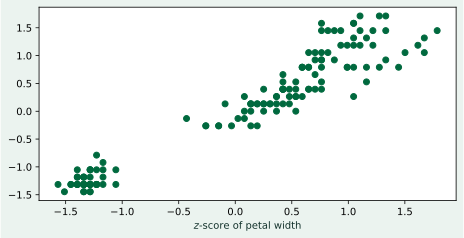

In [27]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 2], X_scaled[:, 3])
plt.xlabel('$z$-score of petal length')
plt.ylabel('$z$-score of petal width');

Note the upward trend indicating a strong correlation between the features! We will now try to get rid of this by using PCA:

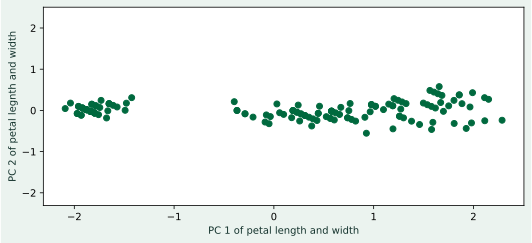

In [33]:
from sklearn.decomposition import PCA

pca = PCA()                     # Instantiate
pca.fit(X_scaled[:, 2:4])       # Fit

X_pc = pca.transform(X_scaled[:, 2:4])  # Transform

plt.scatter(X_pc[:, 0], X_pc[:, 1])
plt.xlabel('PC 1 of petal length and width')
plt.ylabel('PC 2 of petal legnth and width')
plt.ylim(plt.xlim())
plt.tight_layout()

Notice how the upward trend is almost gone! Let's check the correlation before and after:

In [46]:
import numpy as np
rho = np.corrcoef(X_scaled[:, 2], X_scaled[:, 3])[0, 1]
print(f"Before the PCA transform, the two features have a correlation coefficient of {rho=:.2f}.")

rho = np.corrcoef(X_pc[:, 0], X_pc[:, 1])[0, 1]
print(f"After the PCA transform, the two features have a correlation coefficient of {rho=:.2f}.")

Before the PCA transform, the two features have a correlation coefficient of rho=0.96.
After the PCA transform, the two features have a correlation coefficient of rho=-0.00.


Notice also how the variance of the second PC is a lot less than the one of the first PC:

In [51]:
print(f"The first PC has a variance of {X_pc[:, 0].var():.2f}.")
print(f"The second PC has a variance of {X_pc[:, 1].var():.2f}.")

The first PC has a variance of 1.96.
The second PC has a variance of 0.04.


A feature with an almost constant value is not really useful to a machine learning algorithm, because it is the same for every class and does not add any information. We could therefore simply remove this dimension now and only continue with the first principal component!

But first, let's transform all features into the principal components and keep them all for now. We will come back to this later.

In [54]:
pca = PCA()                     # Instantiate
pca.fit(X_scaled)               # Fit

X_pc = pca.transform(X_scaled)  # Transform

There are, of course, a lot more things we could do to preprocess our data. If you like, take a look at the [`sklearn.preprocessing` submodule](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing), pick one of the methods, and try to apply it to our data. For the purposes of this notebook, however, we will consider the preprocessing complete at this point.

## Training a classifier

Now that our data is properly preprocessed, it is time to train a classifier to identify our flowers' species based on their recorded features. Classifiers behave similar to the `StandardScaler` and the `PCA` objects we have already used. To understand their overlap and differences, it may help to briefly discuss `scikit-learns` [basic building blocks](https://scikit-learn.org/stable/developers/develop.html):

### Estimators
Almost all objects in `scikit-learn` are some kind of `Estimator`. An `Estimator` implements a `fit` method to learn its parameters from data. `StandardScaler`, `PCA`, all classifiers and regression models, and many other objects (some of which we will see later) are (also) `Estimator`s.

### Transformer
A `Transformer` is an `Estimator` that implements a `transform` method to modify or filter data. Both `PCA` and `StandardScaler` are `Transformer`s. Most classifiers or regressors are not `Transformer`s, because they do not modify the data.

### Predictor
A `Predictor` is an `Estimator` that also implements a `predict` method to make a prediction based on observed data. This method can generally only be called after `fit` was called. All classifiers and regressors are `Predictor`s.

### Model
A model is a `Predictor` that also implements a `score` method to calculate some kind of [goodness-of-fit](https://en.wikipedia.org/wiki/Goodness_of_fit) or accuracy metric for the predictions.


So there you have it: Preprocessing steps usually involve objects that are some kind of `Transformer`, while the final step of classifying (or fitting a regression model to) the data is done by some kind of `Predictor` or, more commonly, `Model`.

<img src="https://scikit-learn.org/stable/_static/ml_map.png" style="float:right;width:600px;padding:40px">

There is a vast array of models available in `scikit-learn` and choosing the best one for your specific problem is a challenging task all by itself.


In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_pc, y)

KNeighborsClassifier()

## Testing an estimator

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=8)

X_train_scaled = scaler.fit_transform(X_train)
X_train_pc = pca.fit_transform(X_train_scaled)

knn.fit(X_train_pc, y_train)

X_test_scaled = scaler.transform(X_test)
X_test_pc = pca.transform(X_test_scaled)

y_pred = knn.predict(X_test_pc)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## Hyperparameter tuning

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90],
    'p': [1, 2, 3]    
}

search = GridSearchCV(KNeighborsClassifier(), param_grid, verbose=1, n_jobs=-1)
search.fit(X_train_pc, y_train)
search.best_params_

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

In [13]:
print(classification_report(y_test, search.predict(X_test_pc)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## Putting it all together

In [14]:
from sklearn.pipeline import Pipeline

steps = [
    ('scaling', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
]

pipeline = Pipeline(steps)


param_grid = {
    'scaling__with_mean': [True, False],
    'scaling__with_std': [True, False],
    'pca__n_components': [1, 2, 3, 4],
    'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90],
    'knn__p': [1, 2, 3]    
}

find_best = GridSearchCV(pipeline, param_grid, verbose=1, n_jobs=-1)

find_best.fit(X_train, y_train)
find_best.best_params_

Fitting 5 folds for each of 34560 candidates, totalling 172800 fits


{'knn__algorithm': 'auto',
 'knn__leaf_size': 10,
 'knn__n_neighbors': 1,
 'knn__p': 3,
 'knn__weights': 'uniform',
 'pca__n_components': 2,
 'scaling__with_mean': True,
 'scaling__with_std': False}

In [15]:
import pandas as pd
results = pd.DataFrame(find_best.cv_results_)
results.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__algorithm,param_knn__leaf_size,param_knn__n_neighbors,param_knn__p,param_knn__weights,param_pca__n_components,...,param_scaling__with_std,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
25785,0.001022,0.000101,0.001124,0.000847,kd_tree,90,9,2,distance,3,...,False,"{'knn__algorithm': 'kd_tree', 'knn__leaf_size'...",1.000000,1.000,0.958333,1.000,0.958333,0.983333,0.020412,1
20719,0.001003,0.000071,0.002545,0.003332,kd_tree,40,6,3,uniform,4,...,False,"{'knn__algorithm': 'kd_tree', 'knn__leaf_size'...",1.000000,1.000,0.958333,1.000,0.958333,0.983333,0.020412,1
8329,0.000897,0.000025,0.000811,0.000011,auto,90,7,3,uniform,3,...,False,"{'knn__algorithm': 'auto', 'knn__leaf_size': 9...",1.000000,1.000,0.958333,1.000,0.958333,0.983333,0.020412,1
8331,0.000870,0.000024,0.000810,0.000034,auto,90,7,3,uniform,3,...,False,"{'knn__algorithm': 'auto', 'knn__leaf_size': 9...",1.000000,1.000,0.958333,1.000,0.958333,0.983333,0.020412,1
20809,0.000990,0.000109,0.001051,0.000430,kd_tree,40,7,3,uniform,3,...,False,"{'knn__algorithm': 'kd_tree', 'knn__leaf_size'...",1.000000,1.000,0.958333,1.000,0.958333,0.983333,0.020412,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24132,0.000930,0.000019,0.000730,0.000015,kd_tree,80,2,2,uniform,2,...,True,"{'knn__algorithm': 'kd_tree', 'knn__leaf_size'...",0.916667,0.875,0.750000,0.875,0.875000,0.858333,0.056519,34489
9732,0.002248,0.001555,0.001491,0.000931,ball_tree,20,2,2,uniform,2,...,True,"{'knn__algorithm': 'ball_tree', 'knn__leaf_siz...",0.916667,0.875,0.750000,0.875,0.875000,0.858333,0.056519,34489
24134,0.002363,0.001090,0.001732,0.000653,kd_tree,80,2,2,uniform,2,...,True,"{'knn__algorithm': 'kd_tree', 'knn__leaf_size'...",0.916667,0.875,0.750000,0.875,0.875000,0.858333,0.056519,34489
22212,0.000912,0.000018,0.000719,0.000019,kd_tree,60,2,2,uniform,2,...,True,"{'knn__algorithm': 'kd_tree', 'knn__leaf_size'...",0.916667,0.875,0.750000,0.875,0.875000,0.858333,0.056519,34489


In [16]:
print(classification_report(y_test, find_best.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



[1] <a id=anderson_1936></a>Edgar Anderson (1936). "The species problem in Iris". *Annals of the Missouri Botanical Garden*. 23 (3): 457–509. [doi:10.2307/2394164](https://doi.org/10.2307%2F2394164). JSTOR [2394164](https://www.jstor.org/stable/2394164).

[2] <a id=fisher_1936></a>R. A. Fisher (1936). "The use of multiple measurements in taxonomic problems". *Annals of Eugenics*. 7 (2): 179–188. [doi:10.1111/j.1469-1809.1936.tb02137.x](https://doi.org/10.1111%2Fj.1469-1809.1936.tb02137.x). hdl:[2440/15227](https://hdl.handle.net/2440%2F15227). 